# Master Dataframe

We will be combining our water, conflict and demographic data into one master dataframe to be readily used for analysis and modelling.

In [164]:
#importing relevant packages
%run /Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_01_packages.py

In [165]:
# import useful functions
%run /Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py

In [166]:
#defining working directory
filepath = '/Users/thomasadler/Desktop/capstone_docs/'

## Loading datasets

In [167]:
#water points
water_df=pd.read_csv(filepath + 'uganda_water_df_clean.csv')

#check
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108257 entries, 0 to 108256
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 108257 non-null  int64  
 1   row_id                     108257 non-null  int64  
 2   source                     108257 non-null  object 
 3   lat_deg                    108257 non-null  float64
 4   lon_deg                    108257 non-null  float64
 5   report_date                108257 non-null  object 
 6   status_id                  108257 non-null  int64  
 7   facility_type              108257 non-null  object 
 8   clean_country_name         108257 non-null  object 
 9   clean_adm1                 108257 non-null  object 
 10  clean_adm2                 108257 non-null  object 
 11  clean_adm3                 108257 non-null  object 
 12  clean_adm4                 108257 non-null  object 
 13  distance_to_primary        10

In [168]:
#conflict events
conflict_df=pd.read_csv(filepath +'uganda_conflict_df_clean.csv')

#check
conflict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7793 non-null   int64  
 1   data_id         7793 non-null   int64  
 2   event_date      7793 non-null   object 
 3   event_type      7793 non-null   object 
 4   sub_event_type  7793 non-null   object 
 5   actor1          7793 non-null   object 
 6   assoc_actor_1   1920 non-null   object 
 7   inter1          7793 non-null   int64  
 8   actor2          6551 non-null   object 
 9   assoc_actor_2   1647 non-null   object 
 10  inter2          7793 non-null   int64  
 11  interaction     7793 non-null   int64  
 12  clean_adm1      7793 non-null   object 
 13  clean_adm2      7793 non-null   object 
 14  clean_adm3      7793 non-null   object 
 15  clean_adm4      7793 non-null   object 
 16  latitude        7793 non-null   float64
 17  longitude       7793 non-null   f

In [169]:
#demographic variables
demographic_df=pd.read_csv(filepath +'subcounty_demographic_clean.csv')

#check
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1382 non-null   int64  
 1   clean_adm4                   1382 non-null   object 
 2   perc_hh_head_male            1382 non-null   float64
 3   perc_pop612_primary          1382 non-null   float64
 4   perc_pop1318_secondary       1382 non-null   float64
 5   perc_pop18p_illiterate       1382 non-null   float64
 6   perc_pop017_certificate      1382 non-null   float64
 7   perc_pop017_both_parents     1382 non-null   float64
 8   perc_pop2p_disability        1382 non-null   float64
 9   perc_pop1017_married         1382 non-null   float64
 10  perc_pop1217_birth           1382 non-null   float64
 11  perc_pop1464_working         1382 non-null   float64
 12  perc_pop10p_mobile_phone     1382 non-null   float64
 13  perc_hh_temp_dwell

## Merge datasets

We want to get demographic information for each water point at its most local level.

In [170]:
#merge water dataset with demographic dataset
master_df=pd.merge(water_df, demographic_df, how='left',\
                               left_on=water_df['clean_adm4'],\
                               right_on=demographic_df['clean_adm4'], suffixes=['x', 'y'])

#check
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108257 entries, 0 to 108256
Data columns (total 66 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   key_0                        108257 non-null  object 
 1   Unnamed: 0x                  108257 non-null  int64  
 2   row_id                       108257 non-null  int64  
 3   source                       108257 non-null  object 
 4   lat_deg                      108257 non-null  float64
 5   lon_deg                      108257 non-null  float64
 6   report_date                  108257 non-null  object 
 7   status_id                    108257 non-null  int64  
 8   facility_type                108257 non-null  object 
 9   clean_country_name           108257 non-null  object 
 10  clean_adm1                   108257 non-null  object 
 11  clean_adm2                   108257 non-null  object 
 12  clean_adm3                   108257 non-null  object 
 13 

We then want to to know how violent and unstable a region is. We sum up the total number of fatalities and events/conflicts a region has had since 1997 and merge them with our water point and demographic data.

In [171]:
#total number of fatalities by adm4
conflict_fatal_grouped=conflict_df[['clean_adm4', 'fatalities']].groupby('clean_adm4').sum()
conflict_fatal_grouped.columns=['total_fatalities_adm4']
conflict_fatal_grouped.reset_index(inplace=True)

#check
conflict_fatal_grouped

,clean_adm4,total_fatalities_adm4
0,Abala Parish,17.0
1,Abalodyang,5.0
2,Abanga,0.0
3,Abarilera,22.0
4,Abayita Ababiri,0.0
...,...,...
1263,Yumbe,6.0
1264,Zeu,7.0
1265,Zoka,1.0
1266,Zoka Forest,1.0


In [172]:
#number of events by adm4 total
conflict_events_grouped=conflict_df[['clean_adm4', 'data_id']].groupby(['clean_adm4']).count()
conflict_events_grouped.columns=['total_events__adm4']
conflict_events_grouped.reset_index(inplace=True)

#check
conflict_events_grouped

,clean_adm4,total_events__adm4
0,Abala Parish,9
1,Abalodyang,1
2,Abanga,1
3,Abarilera,7
4,Abayita Ababiri,1
...,...,...
1263,Yumbe,11
1264,Zeu,1
1265,Zoka,1
1266,Zoka Forest,3


In [173]:
#drop key_0 to remerge master dataframe
del master_df[master_df.columns[0]]

#merge water dataset with fatalities dataset
master_df=pd.merge(master_df, conflict_fatal_grouped, how='left',\
                               left_on=master_df['clean_adm4x'],\
                               right_on=conflict_fatal_grouped['clean_adm4'],suffixes=('z', 'w'))

#check
master_df.head()

,key_0,Unnamed: 0x,row_id,source,lat_deg,lon_deg,report_date,status_id,facility_type,clean_country_name,...,perc_hh_toilet,perc_hh_own_house,perc_hh_own_tv,perc_hh_bank_acc,perc_hh_subs_farm,perc_hh_less2meals,perc_hh_electricity,tot_pop_subcounty,clean_adm4,total_fatalities_adm4
0,Kabambiro,0,651231,Water For People,0.158537,30.490643,2005-09-07,1,Improved,Uganda,...,1.317831,87.942373,1.249238,10.259377,91.358551,4.212975,4.461754,15484.0,NaN,NaN
1,Nyabbani,1,652323,Water For People,0.070597,30.415651,2005-09-07,1,Improved,Uganda,...,0.866692,88.482012,2.614604,14.573029,92.319897,4.458575,7.565426,21953.0,NaN,NaN
2,Kabambiro,2,654375,Water For People,0.158667,30.490551,2005-09-07,1,Improved,Uganda,...,1.317831,87.942373,1.249238,10.259377,91.358551,4.212975,4.461754,15484.0,NaN,NaN
3,Kamwenge,3,654822,Water For People,0.208128,30.386393,2005-09-07,1,Improved,Uganda,...,1.487369,87.243217,2.055043,12.522317,91.411940,3.893017,5.780841,22010.0,NaN,NaN
4,Kicheche,4,660256,Water For People,-0.134680,30.351593,2005-09-07,1,Improved,Uganda,...,0.983537,89.721699,4.054211,20.201299,87.522511,4.271490,9.606041,26338.0,NaN,NaN


In [174]:
#drop key_0 to remerge master dataframe
del master_df[master_df.columns[0]]

#merge water dataset with fatalities dataset
master_df=pd.merge(master_df, conflict_events_grouped, how='left',\
                               left_on=master_df['clean_adm4x'],\
                               right_on=conflict_events_grouped['clean_adm4'], suffixes=('a', 'b'))

#check
master_df.head()

,key_0,Unnamed: 0x,row_id,source,lat_deg,lon_deg,report_date,status_id,facility_type,clean_country_name,...,perc_hh_own_tv,perc_hh_bank_acc,perc_hh_subs_farm,perc_hh_less2meals,perc_hh_electricity,tot_pop_subcounty,clean_adm4a,total_fatalities_adm4,clean_adm4b,total_events__adm4
0,Kabambiro,0,651231,Water For People,0.158537,30.490643,2005-09-07,1,Improved,Uganda,...,1.249238,10.259377,91.358551,4.212975,4.461754,15484.0,NaN,NaN,NaN,NaN
1,Nyabbani,1,652323,Water For People,0.070597,30.415651,2005-09-07,1,Improved,Uganda,...,2.614604,14.573029,92.319897,4.458575,7.565426,21953.0,NaN,NaN,NaN,NaN
2,Kabambiro,2,654375,Water For People,0.158667,30.490551,2005-09-07,1,Improved,Uganda,...,1.249238,10.259377,91.358551,4.212975,4.461754,15484.0,NaN,NaN,NaN,NaN
3,Kamwenge,3,654822,Water For People,0.208128,30.386393,2005-09-07,1,Improved,Uganda,...,2.055043,12.522317,91.411940,3.893017,5.780841,22010.0,NaN,NaN,NaN,NaN
4,Kicheche,4,660256,Water For People,-0.134680,30.351593,2005-09-07,1,Improved,Uganda,...,4.054211,20.201299,87.522511,4.271490,9.606041,26338.0,NaN,NaN,NaN,NaN


In [175]:
#choose relevant columns
master_df.columns

Index(['key_0', 'Unnamed: 0x', 'row_id', 'source', 'lat_deg', 'lon_deg',
       'report_date', 'status_id', 'facility_type', 'clean_country_name',
       'clean_adm1', 'clean_adm2', 'clean_adm3', 'clean_adm4x',
       'distance_to_primary', 'distance_to_secondary', 'distance_to_tertiary',
       'distance_to_city', 'distance_to_town', 'usage_cap', 'staleness_score',
       'is_latest', 'location_id', 'cluster_size', 'new_georeferenced_column_',
       'lat_lon_deg', 'count', 'water_source_clean', 'water_source_category',
       'wpdx_id', 'install_year', 'management_clean', 'status_clean',
       'served_population', 'local_population', 'crucialness', 'pressure',
       'Unnamed: 0y', 'clean_adm4y', 'perc_hh_head_male',
       'perc_pop612_primary', 'perc_pop1318_secondary',
       'perc_pop18p_illiterate', 'perc_pop017_certificate',
       'perc_pop017_both_parents', 'perc_pop2p_disability',
       'perc_pop1017_married', 'perc_pop1217_birth', 'perc_pop1464_working',
       'perc_pop1

We choose columns which may potentially be able to help us predict whether a water point is functioning or not. 

In [176]:
#choosing relevant columns for analysis
master_df_clean = master_df[['wpdx_id',
    'lat_deg', 'lon_deg', 'status_id',
    'clean_adm1', 'clean_adm2', 'clean_adm3', 'clean_adm4x', 'distance_to_primary',
    'distance_to_secondary', 'distance_to_tertiary', 'distance_to_city',
    'distance_to_town', 'usage_cap', 'staleness_score', 'cluster_size', 'water_source_clean','install_year',
    'management_clean', 'served_population', 'local_population', 'crucialness', 'pressure',
    'perc_hh_head_male', 'perc_pop612_primary', 'perc_pop1318_secondary',
    'perc_pop18p_illiterate', 'perc_pop017_certificate',
    'perc_pop017_both_parents', 'perc_pop2p_disability', 'perc_pop1017_married',
    'perc_pop1217_birth', 'perc_pop1464_working', 'perc_pop10p_mobile_phone',
    'perc_hh_temp_dwelling', 'perc_hh_mosquito_net', 'perc_hh_piped_water',
    'perc_hh_borehole', 'perc_hh_toilet', 'perc_hh_own_house',
    'perc_hh_own_tv', 'perc_hh_bank_acc', 'perc_hh_subs_farm',
    'perc_hh_less2meals', 'perc_hh_electricity', 'total_fatalities_adm4',
    'total_events__adm4'
]]

#check
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108257 entries, 0 to 108256
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   wpdx_id                   107227 non-null  object 
 1   lat_deg                   108257 non-null  float64
 2   lon_deg                   108257 non-null  float64
 3   status_id                 108257 non-null  int64  
 4   clean_adm1                108257 non-null  object 
 5   clean_adm2                108257 non-null  object 
 6   clean_adm3                108257 non-null  object 
 7   clean_adm4x               108257 non-null  object 
 8   distance_to_primary       108257 non-null  float64
 9   distance_to_secondary     108257 non-null  float64
 10  distance_to_tertiary      108257 non-null  float64
 11  distance_to_city          108257 non-null  float64
 12  distance_to_town          108257 non-null  float64
 13  usage_cap                 108257 non-null  f

## Clean data

In [177]:
#checking null values
print(f'There are {master_df_clean.isna().sum().sum()} null values')

There are 296645 null values


In [178]:
#checking regions of Uganda
master_df_clean['clean_adm1'].value_counts()

Western     41030
Eastern     25181
Northern    24378
Central     17643
Nebbi           9
Arua            5
Kabale          4
Kanungu         2
Mbarara         2
Kasese          2
Kisoro          1
Name: clean_adm1, dtype: int64

There are only 4 regions in Uganda. This is a mistake in the dataset and will correct this.

In [179]:
#correcting region name
master_df_clean['clean_adm1']=master_df_clean['clean_adm1'].map({'Western': 'Western', 'Eastern':'Eastern',
'Northern': 'Northern', 'Central': 'Central', 'Nebbi': 'Northern', 'Arua': 'Northern', 'Kabale': 'Western',
'Kanungu': 'Western', 'Mbarara': 'Western', 'Kasese': 'Western', 'Kisoro': 'Western',  })

#check
master_df_clean['clean_adm1'].value_counts()

Western     41041
Eastern     25181
Northern    24392
Central     17643
Name: clean_adm1, dtype: int64

In [180]:
#checking fornat of distances
master_df_clean[['distance_to_primary', 'distance_to_secondary', 'distance_to_tertiary', 'distance_to_city']].describe().T


,count,mean,std,min,25%,50%,75%,max
distance_to_primary,108257.0,17386.191965,16333.656137,0.169448,4458.10060,13128.9910,26233.0530,113267.730
distance_to_secondary,108257.0,5488.945501,6352.939672,0.034171,1142.62790,3481.8005,7435.0850,48801.574
distance_to_tertiary,108257.0,2857.643205,3553.321536,0.021833,480.66837,1619.1466,3836.7668,33601.773
distance_to_city,108257.0,42258.843704,30453.424475,55.531650,20435.38700,36167.3900,57617.5430,222690.450


The distances are evidently in metres, as we know that the area of Uganda is 241,000 km $^2$. So we want transform these columns into kilometres, to make our analysis and interpretation easier.

In [181]:
#list of columns we want to reformat
distances=['distance_to_primary', 'distance_to_secondary', 'distance_to_tertiary', 'distance_to_city']

#transform into kilometres
master_df_clean[distances]=master_df_clean[distances]/1000

#check
master_df_clean[['distance_to_primary', 'distance_to_secondary', 'distance_to_tertiary', 'distance_to_city']].describe().T

,count,mean,std,min,25%,50%,75%,max
distance_to_primary,108257.0,17.386192,16.333656,0.000169,4.458101,13.128991,26.233053,113.267730
distance_to_secondary,108257.0,5.488946,6.352940,0.000034,1.142628,3.481800,7.435085,48.801574
distance_to_tertiary,108257.0,2.857643,3.553322,0.000022,0.480668,1.619147,3.836767,33.601773
distance_to_city,108257.0,42.258844,30.453424,0.055532,20.435387,36.167390,57.617543,222.690450


In [182]:
# choose numerical columns
master_df_clean_numerical = master_df_clean[
    master_df_clean.select_dtypes(exclude='object').columns]

# check
master_df_clean_numerical.head()

,lat_deg,lon_deg,status_id,distance_to_primary,distance_to_secondary,distance_to_tertiary,distance_to_city,distance_to_town,usage_cap,staleness_score,...,perc_hh_borehole,perc_hh_toilet,perc_hh_own_house,perc_hh_own_tv,perc_hh_bank_acc,perc_hh_subs_farm,perc_hh_less2meals,perc_hh_electricity,total_fatalities_adm4,total_events__adm4
0,0.158537,30.490643,1,37.666023,4.875484,0.023399,45.104836,32223.873,250.0,14.422875,...,34.360863,1.317831,87.942373,1.249238,10.259377,91.358551,4.212975,4.461754,NaN,NaN
1,0.070597,30.415651,1,35.843273,2.602279,0.971238,38.419560,24194.055,250.0,14.422875,...,13.201162,0.866692,88.482012,2.614604,14.573029,92.319897,4.458575,7.565426,NaN,NaN
2,0.158667,30.490551,1,37.651727,4.860170,0.034916,45.094210,32236.693,250.0,14.422875,...,34.360863,1.317831,87.942373,1.249238,10.259377,91.358551,4.212975,4.461754,NaN,NaN
3,0.208128,30.386393,1,24.849943,4.290553,0.038743,33.706120,39617.297,300.0,14.422875,...,17.053526,1.487369,87.243217,2.055043,12.522317,91.411940,3.893017,5.780841,NaN,NaN
4,-0.134680,30.351593,1,29.073130,6.369318,3.270907,45.044160,16042.707,250.0,14.422875,...,2.450680,0.983537,89.721699,4.054211,20.201299,87.522511,4.271490,9.606041,NaN,NaN


In [183]:
# choose columns with null values
null_cols = master_df_clean_numerical.isna().sum()
cols_to_impute = null_cols[null_cols > 0].index
cols_to_impute = cols_to_impute.drop(['total_events__adm4','total_fatalities_adm4'])

# check
cols_to_impute

Index(['perc_hh_head_male', 'perc_pop612_primary', 'perc_pop1318_secondary',
       'perc_pop18p_illiterate', 'perc_pop017_certificate',
       'perc_pop017_both_parents', 'perc_pop2p_disability',
       'perc_pop1017_married', 'perc_pop1217_birth', 'perc_pop1464_working',
       'perc_pop10p_mobile_phone', 'perc_hh_temp_dwelling',
       'perc_hh_mosquito_net', 'perc_hh_piped_water', 'perc_hh_borehole',
       'perc_hh_toilet', 'perc_hh_own_house', 'perc_hh_own_tv',
       'perc_hh_bank_acc', 'perc_hh_subs_farm', 'perc_hh_less2meals',
       'perc_hh_electricity'],
      dtype='object')

Here, we will first fill the null values for the demographic data with the median of its lowest level region, `adm4`.

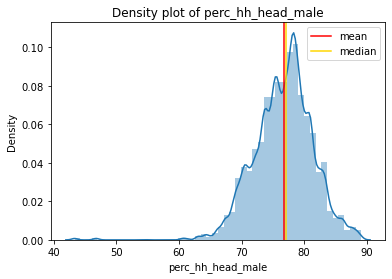

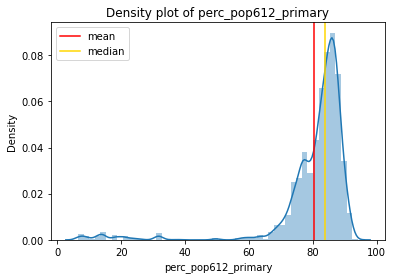

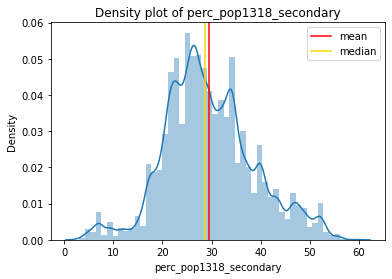

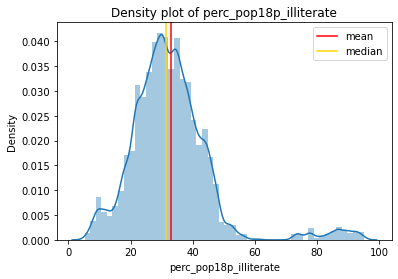

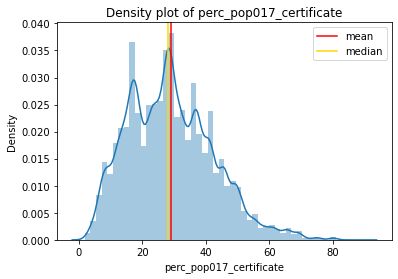

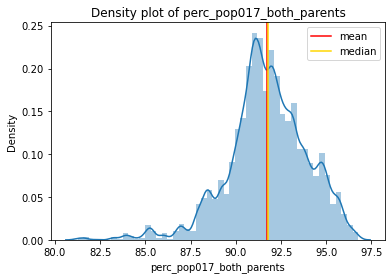

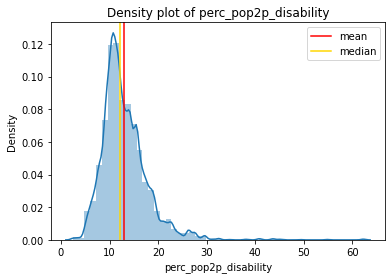

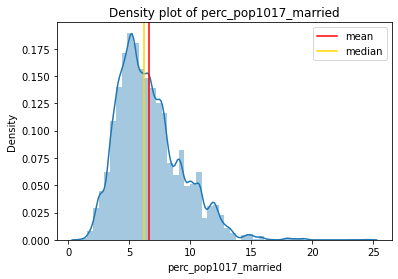

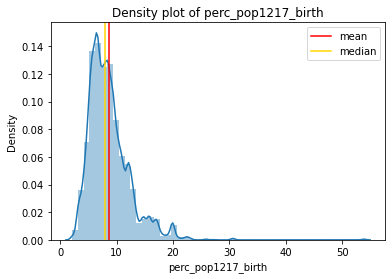

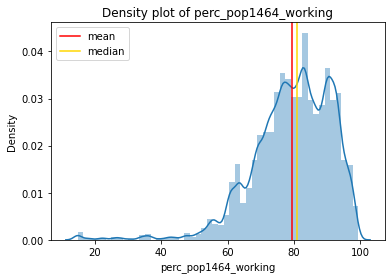

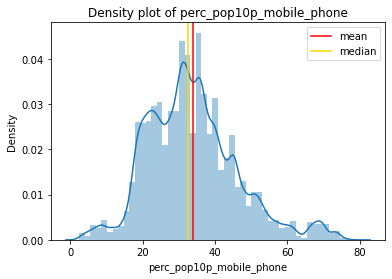

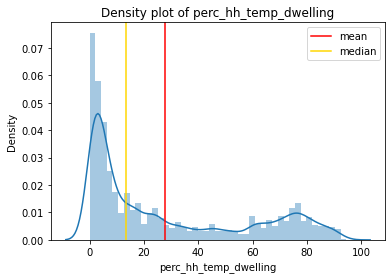

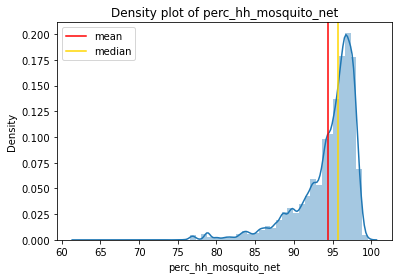

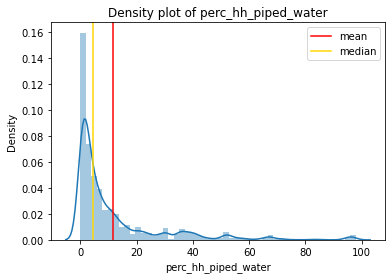

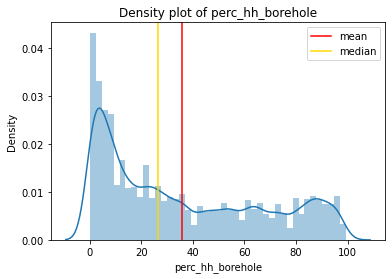

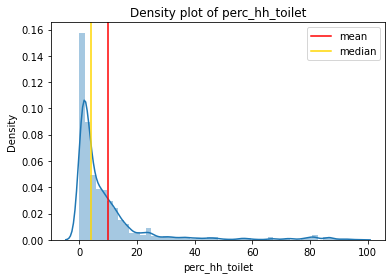

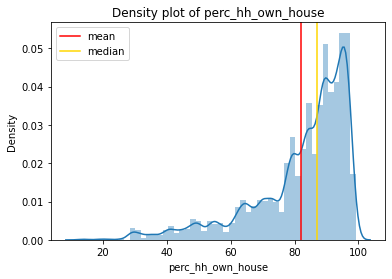

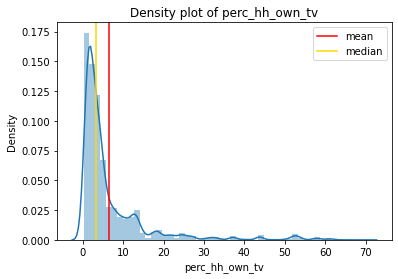

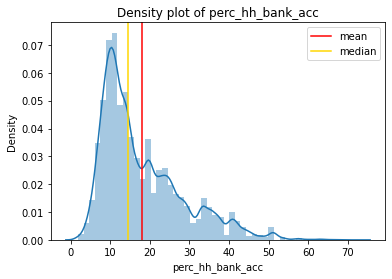

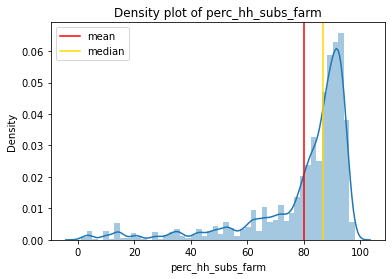

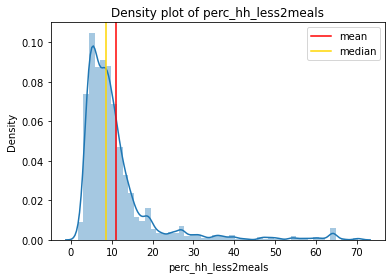

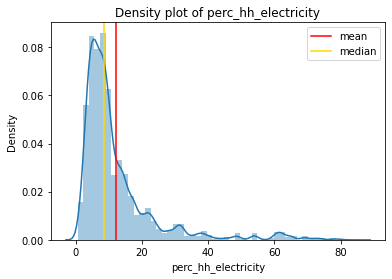

In [184]:
# showing distribution of value we want to inpute and where mean/median is situated
for col in cols_to_impute:
    plt.figure()
    sns.distplot(master_df_clean_numerical[col])
    plt.axvline(master_df_clean_numerical[col].mean(), c='r', label='mean')
    plt.axvline(master_df_clean_numerical[col].median(), c='gold', label='median')
    plt.legend()
    plt.title(f'Density plot of {col}')
    plt.show()

These graphs show us that the median is a better alternative to mean as it is more representative of our dataset.

In [185]:
# fill missing values with adm4 median
for col in cols_to_impute:
    missing_to_regional_median(master_df_clean, col, 'clean_adm4x')

#checking remaining null values
master_df_clean.isna().sum().sum()

296645

Since we still have missing values we fill missing values with the median of next lowest administrative leel, adm3. We go on until we do not have any more missing values.

In [186]:
# fill missing values with adm3 median
for col in cols_to_impute:
    missing_to_regional_median(master_df_clean, col, 'clean_adm3')

#checking remaining null values
master_df_clean.isna().sum().sum()

208513

In [187]:
# fill missing values with adm2 median
for col in cols_to_impute:
    missing_to_regional_median(master_df_clean, col, 'clean_adm2')

#checking remaining null values
master_df_clean.isna().sum().sum()

202309

In [188]:
# fill missing values with adm1 median
for col in cols_to_impute:
    missing_to_regional_median(master_df_clean, col, 'clean_adm1')

#checking remaining null values
master_df_clean.isna().sum().sum()

201935

We end up inputting the country's median for the few remaining missing values.

In [189]:
# fill the final null values with the median value of the whole country
for col in cols_to_impute:
    master_df_clean[col] = master_df_clean[col].fillna(
        master_df_clean[col].median())

# check remaining null values
master_df_clean.isna().sum().sum()

201935

Missing values for fatalities/events essentially mean there were no conflicts or fatalities for that region since 1997. We assume that the conflict dataset we accessed was extensive and included all conflicts since 1997.

In [190]:
#fill missing fatalities/events values with 0
master_df_clean.isna().sum()
for col in ['total_fatalities_adm4','total_events__adm4']:
    master_df_clean[col] = master_df_clean[col].fillna(0)

# check remaining null values
master_df_clean.isna().sum().sum()

54335

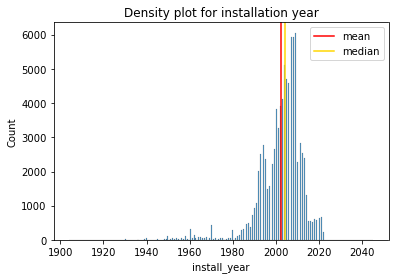

In [191]:
# convert to datetime
date_converter(master_df_clean, 'install_year')

#converting to year
master_df_clean['install_year']=master_df_clean['install_year'].dt.year

#visualising distribution of installation year
plt.figure()
sns.histplot(master_df_clean['install_year'])
plt.axvline(master_df_clean['install_year'].mean(), c='r', label='mean')
plt.axvline(master_df_clean['install_year'].median(), c='gold', label='median')
plt.legend()
plt.title(f'Density plot for installation year')
plt.show()

We choose to create a binary column for the installation year. All water points constructed after 2006 are encoded with a 1, and all before are encoded 0. We choose 2006 because it was the [first multi-party election in Uganda for 25 years](http://news.bbc.co.uk/1/hi/world/africa/4750040.stm). We consider this a an important enough turning point to differentiate between water points. As we see on the distribution above, we have a healthy balance of constructions before and after 2006. In addition, water points with missing installation year information are encoded with 0. We assume that if the installation year was unknown, it was probably because it was old (when bookeeping and official records were not as good). We would expect to see that water points constructed after 2006 might be of better quality due to a more democratic government and better technology.

In [192]:
#dummy column if installation year is before(0)/after(1) the year 2000
master_df_clean['install_year'] = np.where(
    master_df_clean['install_year'] >= 2006, 1, 0)

#fill unknown years to 0
master_df_clean['install_year'] = master_df_clean['install_year'].fillna(0)


#check
master_df_clean['install_year'].value_counts()

0    70011
1    38246
Name: install_year, dtype: int64

We consider entities from the government, public institutionsa to be a form of "public" management. We also include community management as we assume they are, in some way, related to local governments or governance structures. We also assume that they have similar goals and incentives to the more formal government institutions. Religious, health and medical facilities follow the same reasoning. It is interesting to see whether public or private management structures aremore likely to keep a water point functioning: although their goals are different, their incentives might still make them want to keep a water point working.

In [193]:
#consider following mangement to be public
public_management=['Other Institutional Management', 'Direct Government Operation', 'Community Management',
'School Management','Religious Institution','Health Care Facility' ]

#dummy column into binary, public(1) or not public(0)
master_df_clean['management_clean'] = np.where(
    master_df_clean['management_clean'].isin(public_management), 1, 0)

#check
master_df_clean['management_clean'].value_counts()

1    80756
0    27501
Name: management_clean, dtype: int64

In [194]:
#check what column looks like
master_df_clean['water_source_clean'].value_counts()

Borehole                   40319
Protected Spring           28812
Rainwater Harvesting       16313
Protected Shallow Well      3137
Protected Well              1734
Piped Water                  285
Undefined Shallow Well       207
Undefined Spring             161
Delivered Water               44
Sand or Sub-surface Dam        1
Packaged Water                 1
Name: water_source_clean, dtype: int64

We create a binary column identifying whether the water point technology is complex or not. We use analysis made by [Ravi & Rogger, 2021](http://www.rsomani.com/uploads/1/1/7/6/117690547/water_points_and_elections.pdf) to make this decision.

In [195]:
#list of "technologically complex" water source
complex_tech=['Borehole', 'Piped Water', 'Sand or Sub-surface Dam', 'Packaged Water', 'Delivered Water']
 
#dummy column into binary, complex techology(1) or not not(0)
master_df_clean['water_source_clean'] = np.where(
    master_df_clean['water_source_clean'].isin(complex_tech), 1, 0)

#check
master_df_clean['water_source_clean'].value_counts()

0    67607
1    40650
Name: water_source_clean, dtype: int64

In [196]:
#checking missing values
master_df_clean.isna().sum().sum()

1030

In [197]:
#check column names to be renamed
master_df_clean.columns

Index(['wpdx_id', 'lat_deg', 'lon_deg', 'status_id', 'clean_adm1',
       'clean_adm2', 'clean_adm3', 'clean_adm4x', 'distance_to_primary',
       'distance_to_secondary', 'distance_to_tertiary', 'distance_to_city',
       'distance_to_town', 'usage_cap', 'staleness_score', 'cluster_size',
       'water_source_clean', 'install_year', 'management_clean',
       'served_population', 'local_population', 'crucialness', 'pressure',
       'perc_hh_head_male', 'perc_pop612_primary', 'perc_pop1318_secondary',
       'perc_pop18p_illiterate', 'perc_pop017_certificate',
       'perc_pop017_both_parents', 'perc_pop2p_disability',
       'perc_pop1017_married', 'perc_pop1217_birth', 'perc_pop1464_working',
       'perc_pop10p_mobile_phone', 'perc_hh_temp_dwelling',
       'perc_hh_mosquito_net', 'perc_hh_piped_water', 'perc_hh_borehole',
       'perc_hh_toilet', 'perc_hh_own_house', 'perc_hh_own_tv',
       'perc_hh_bank_acc', 'perc_hh_subs_farm', 'perc_hh_less2meals',
       'perc_hh_electricity

In [198]:
#rename column
master_df_clean.rename(columns = {'status_id':'is_functioning', 'install_year':'is_installed_after_2000', 'water_source_clean':'is_complex_tech', 'management_clean':'is_public_management','clean_adm4x':'clean_adm4' }, inplace = True)

In [199]:
#checking final dataframe
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108257 entries, 0 to 108256
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   wpdx_id                   107227 non-null  object 
 1   lat_deg                   108257 non-null  float64
 2   lon_deg                   108257 non-null  float64
 3   is_functioning            108257 non-null  int64  
 4   clean_adm1                108257 non-null  object 
 5   clean_adm2                108257 non-null  object 
 6   clean_adm3                108257 non-null  object 
 7   clean_adm4                108257 non-null  object 
 8   distance_to_primary       108257 non-null  float64
 9   distance_to_secondary     108257 non-null  float64
 10  distance_to_tertiary      108257 non-null  float64
 11  distance_to_city          108257 non-null  float64
 12  distance_to_town          108257 non-null  float64
 13  usage_cap                 108257 non-null  f

In [200]:
# checking duplicated rows
print(f"There are {master_df_clean.duplicated().sum()} duplicated rows.")

master_df_clean_final=master_df_clean.drop_duplicates()

print(f"There are now {master_df_clean_final.duplicated().sum()} duplicated rows.")


There are 1719 duplicated rows.
There are now 0 duplicated rows.


Our dataset is now ready for EDA, feature selection and modelling. We have no missing values, no duplicate rows, every column is interpretable and can be modelled.

In [201]:
# export to cleaned dataset to csv
master_df_clean_final.to_csv(filepath + 'master_df.csv')

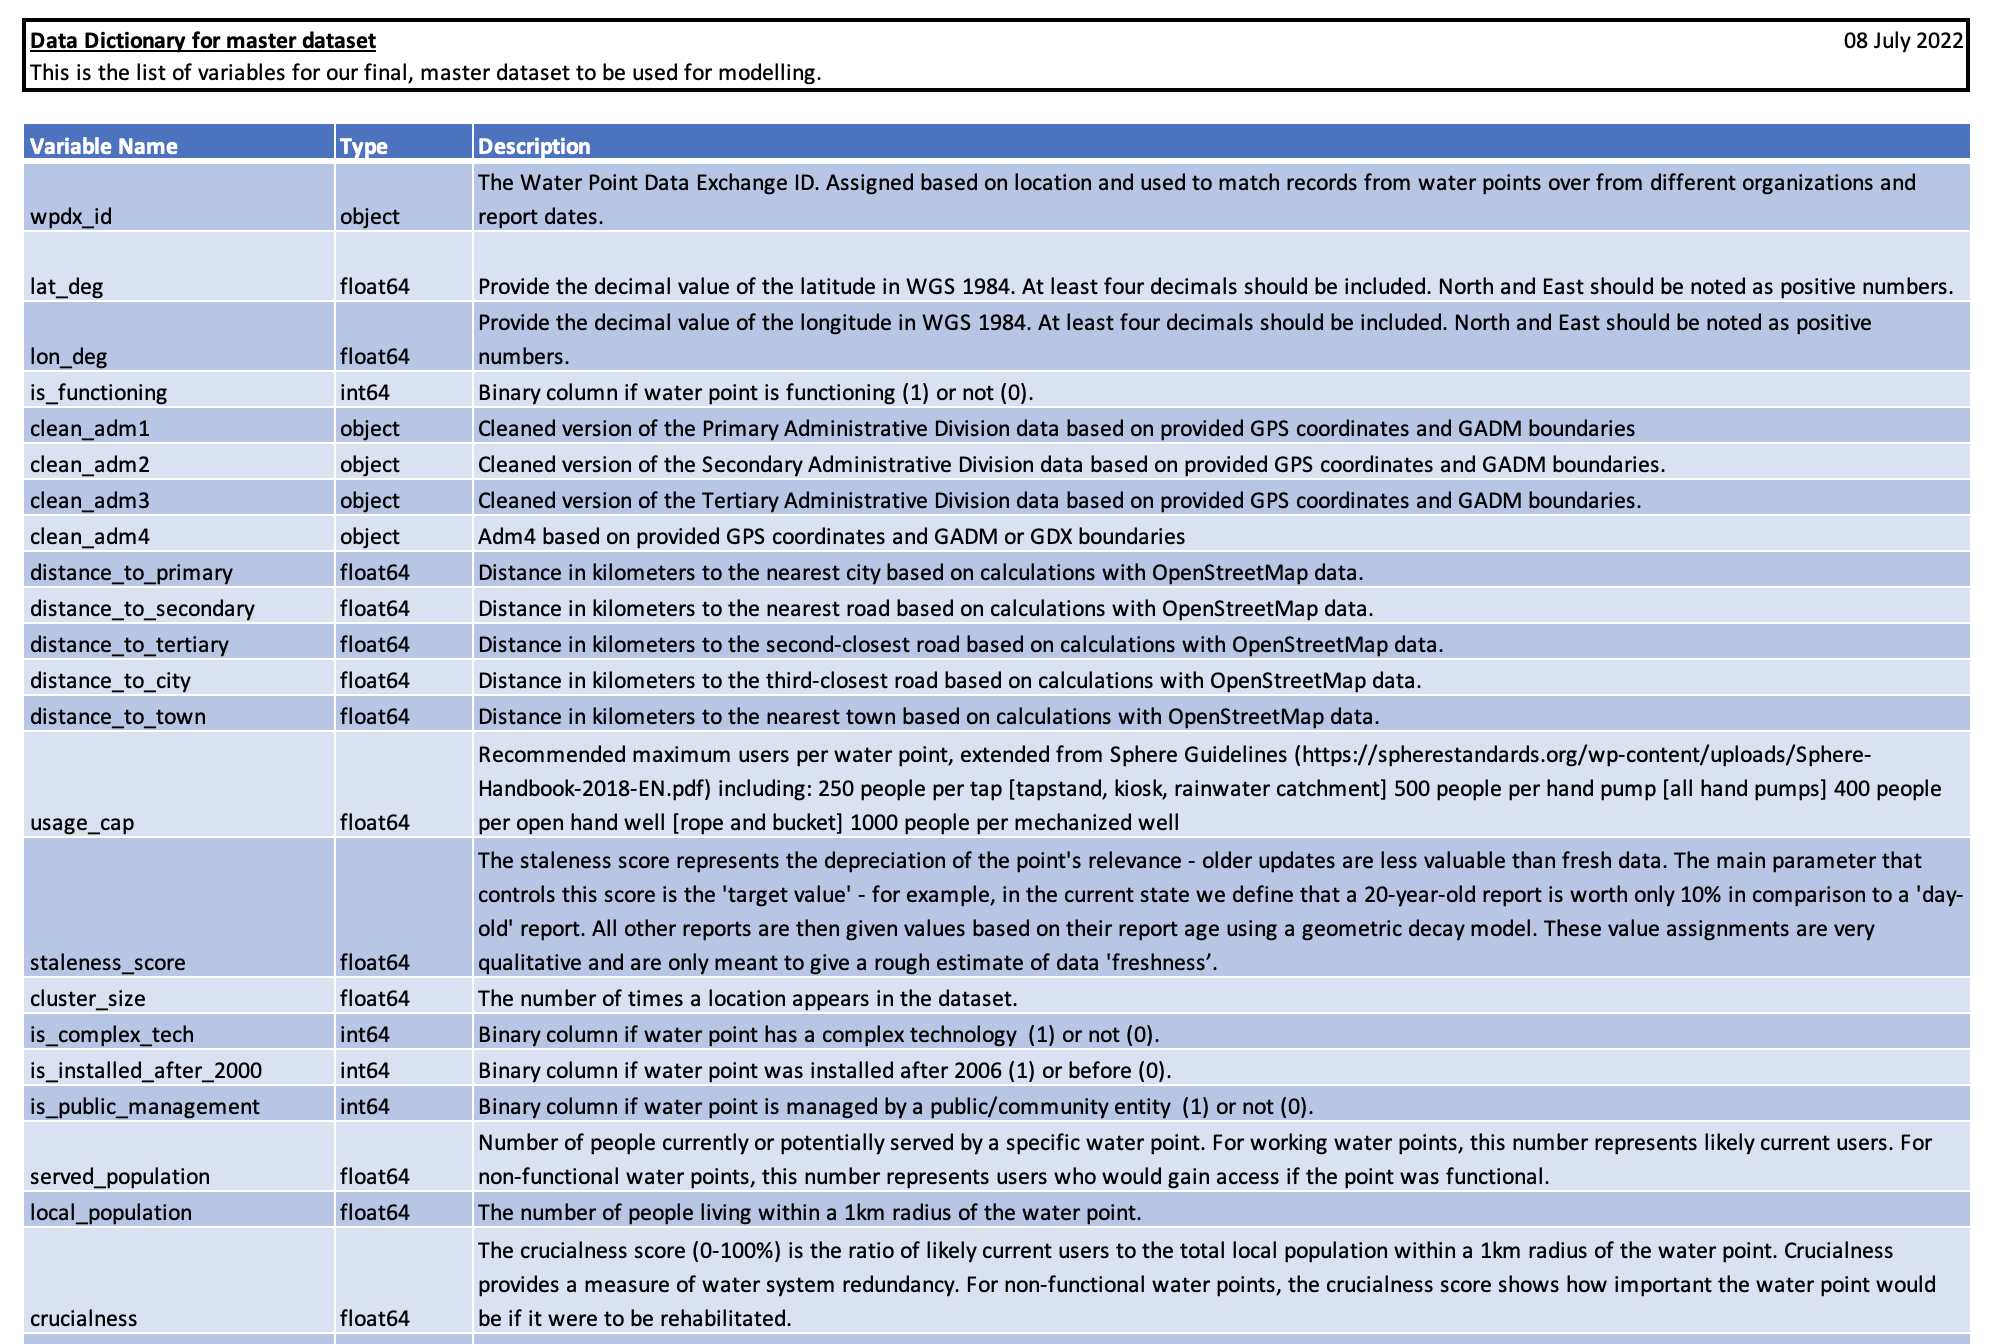

In [202]:
#data dictionary part A
Image("/Users/thomasadler/Desktop/futuristic-platipus/data_dictionary/4A-Master-Dictionary.png")


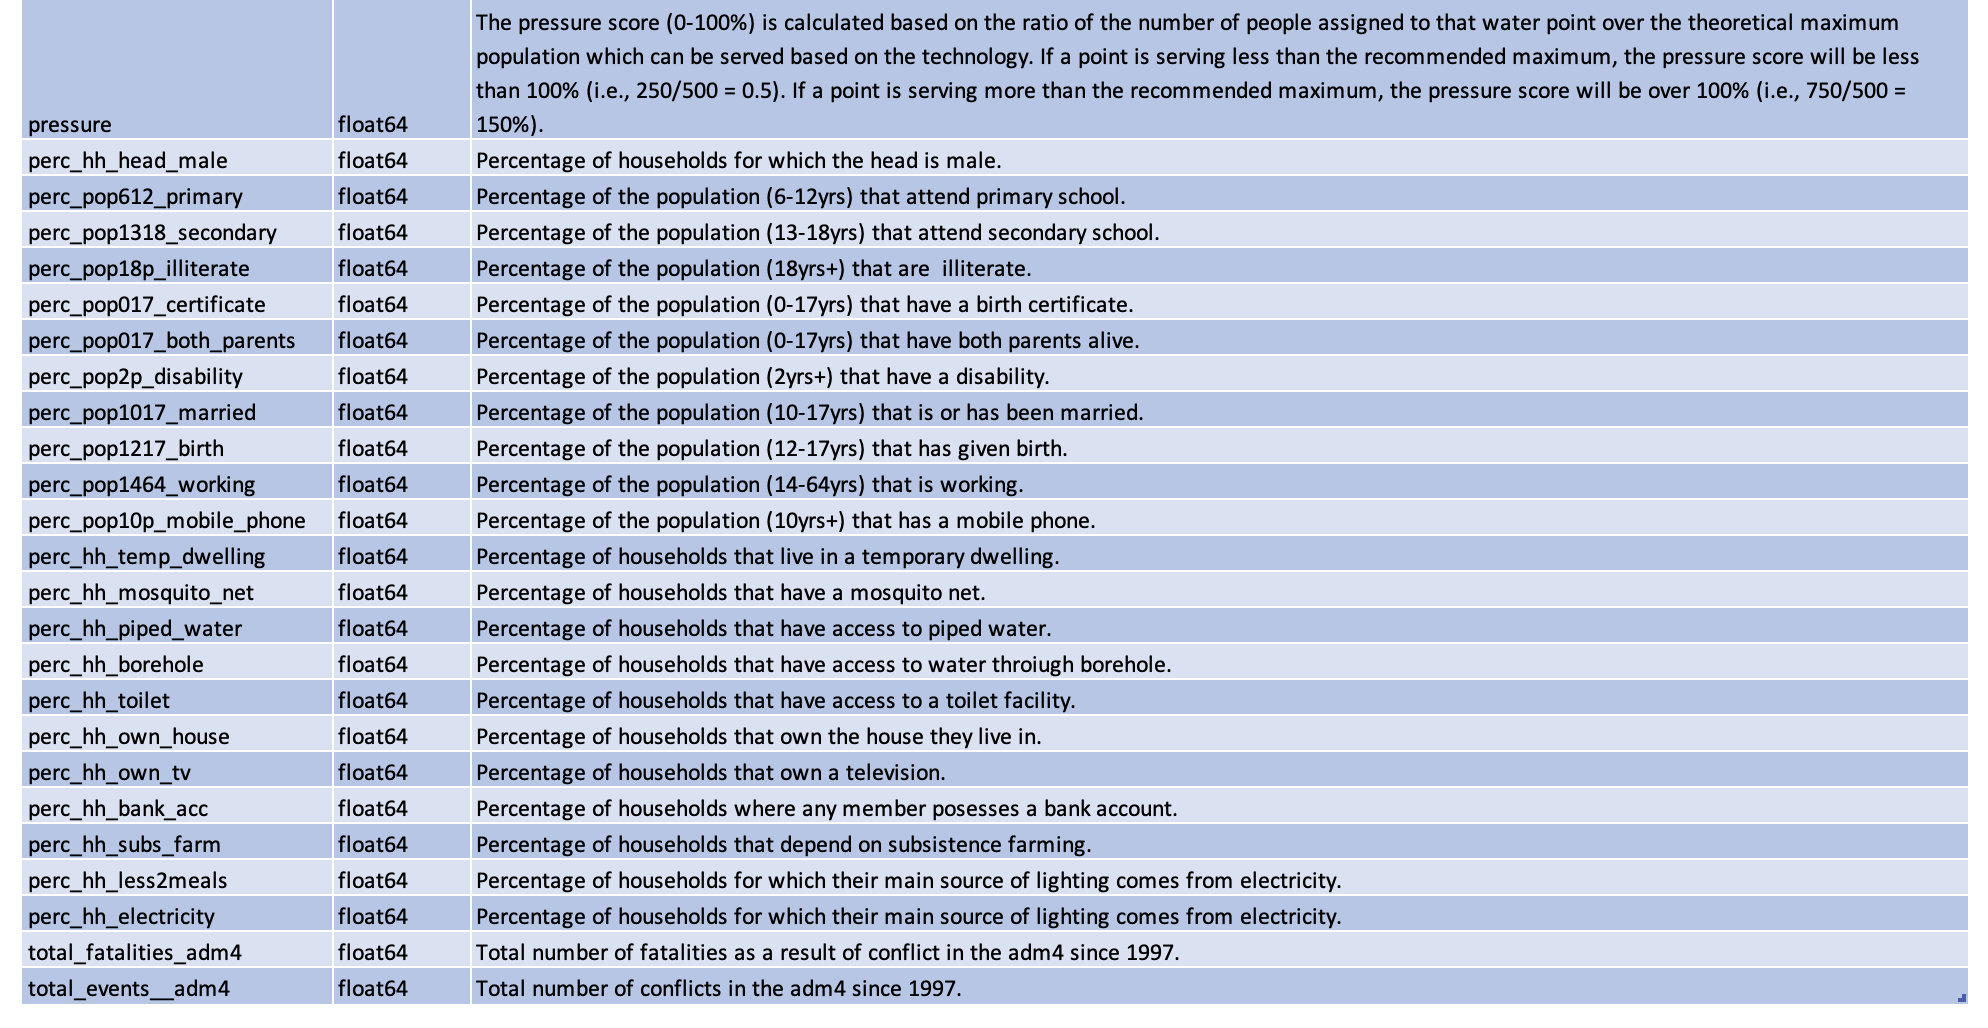

In [203]:
#data dictionary part B
Image("/Users/thomasadler/Desktop/futuristic-platipus/data_dictionary/4B-Master-Dictionary.png")